<a href="https://colab.research.google.com/github/Yashmaini30/Breast-Cancer-Detection/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library Imports


In [4]:
import tensorflow as tf
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import random
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


from google.colab import drive


In [5]:
drive.mount('/content/drive')
path = "../content/drive/MyDrive/Dataset_BUSI_with_GT/"
data_dir = Path(path)

Mounted at /content/drive


In [6]:
if not data_dir.exists():
    print("The specified path does not exist.")
else:
    all_items = os.listdir(path)
    print("Contents of the dataset directory using os.listdir:", all_items)

Contents of the dataset directory using os.listdir: ['normal', 'malignant', 'benign']


class names


In [7]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['benign', 'malignant', 'normal'], dtype='<U9')

Defining Path


In [9]:
benignPath = os.path.join(data_dir, "benign")
malignPath = os.path.join(data_dir, "malignant")
normalPath = os.path.join(data_dir, "normal")

No. of Images


In [10]:
imageCount = len(list(data_dir.glob('*/*.png')))
imageCount

1578

Plotting Random Images


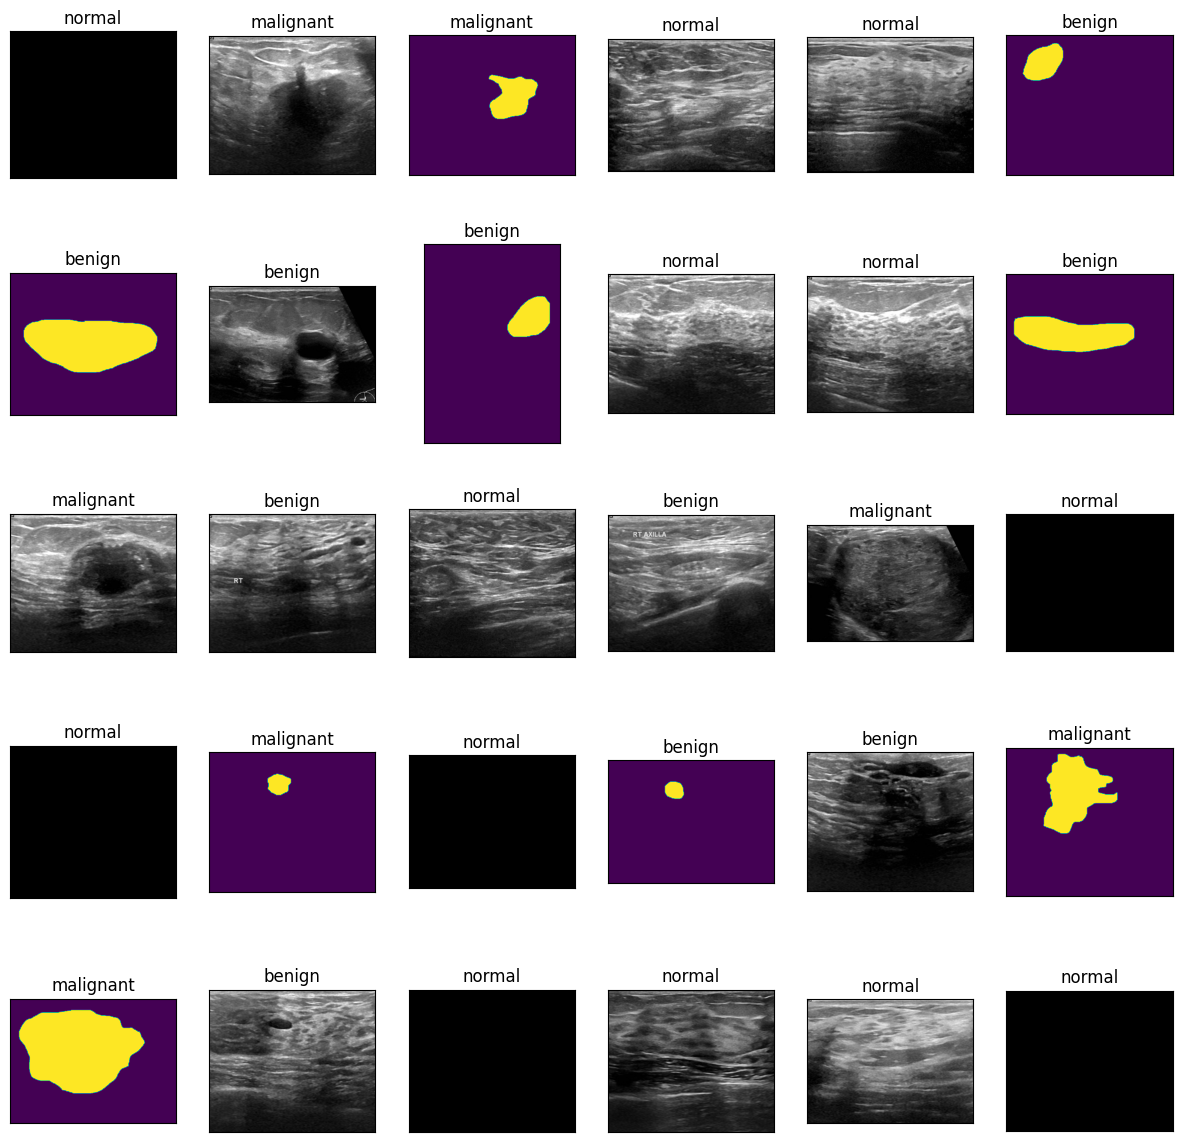

In [11]:
plt.figure(figsize=(15,15))

for i in range(30):
    plt.subplot(5,6,i+1)
    random_class = random.choice(class_names)
    img = plt.imread(random.choice(list(data_dir.glob(random_class+"/*.png"))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)

In [12]:
import imghdr

data_dir = "../content/drive/MyDrive/Dataset_BUSI_with_GT/"
image_extensions = [".png", ".jpg"]

img_type_accepted_by_tf = ["gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

**BUILD CNN**

In [15]:
batch_size = 32
img_height = 224
img_width = 224

separating datasets


In [16]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 1578 files belonging to 3 classes.
Using 1263 files for training.
Found 1578 files belonging to 3 classes.
Using 315 files for validation.


In [17]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3,activation="softmax")
])

In [18]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

In [19]:
epochs = 2
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data,
                    batch_size=batch_size)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


40/40 [==============================] - 83s 2s/step - loss: 0.9125 - accuracy: 0.5598 - val_loss: 0.7575 - val_accuracy: 0.6889
Epoch 2/2
40/40 [==============================] - 72s 2s/step - loss: 0.6486 - accuracy: 0.7118 - val_loss: 0.6967 - val_accuracy: 0.6952


In [20]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

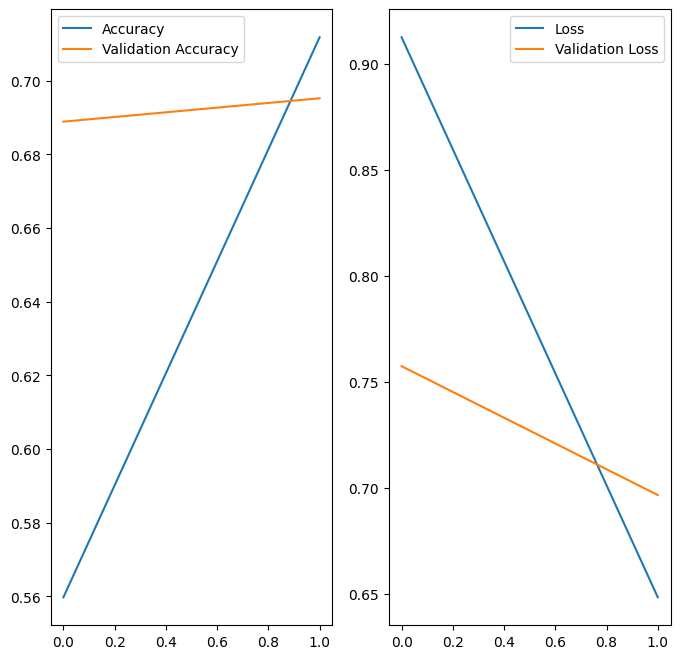

In [21]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

In [22]:
model.evaluate(val_data)

10/10 [==============================] - 6s 381ms/step - loss: 0.6967 - accuracy: 0.6952


[0.696744978427887, 0.6952381134033203]

In [23]:

y_true = []
y_pred = []

for images, labels in val_data:
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_classes)

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

print(classification_report(y_true, y_pred, target_names=class_names))


1/1 [==============================] - 1s 699ms/step
Precision: 0.7045
Recall: 0.6952
F1 Score: 0.6584
              precision    recall  f1-score   support

      benign       0.67      0.93      0.78       180
   malignant       0.63      0.24      0.35        80
      normal       0.91      0.58      0.71        55

    accuracy                           0.70       315
   macro avg       0.74      0.58      0.61       315
weighted avg       0.70      0.70      0.66       315



In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

1/1 [==============================] - 0s 31ms/step


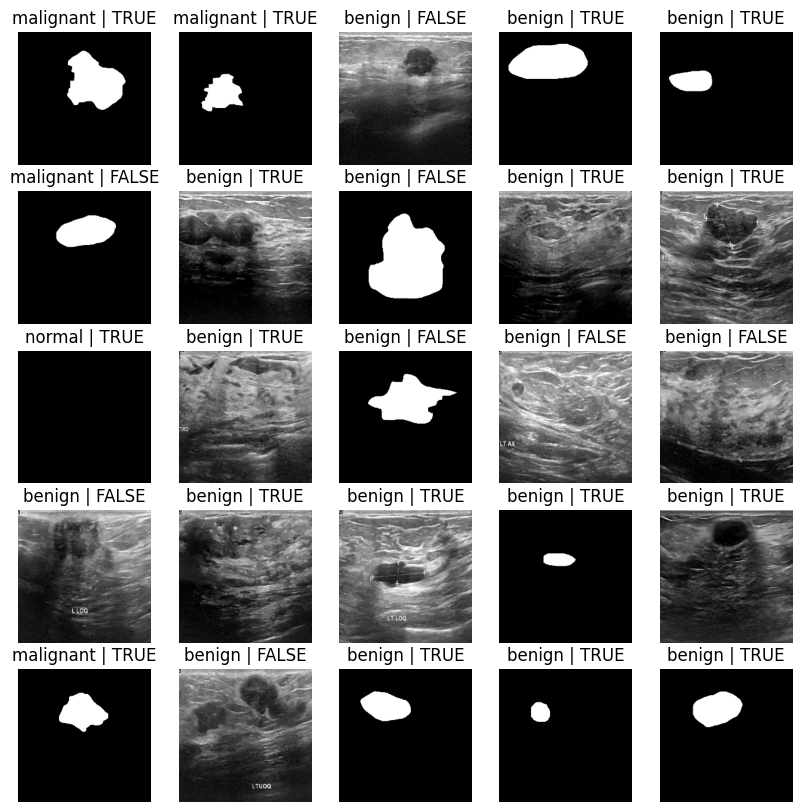

In [28]:
plt.figure(figsize=(10, 10))
class_names = val_data.class_names

for images, labels in val_data.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)

        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)

        result = ' | FALSE'
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'

        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class] + result)
        plt.axis("off")
plt.show()
